---

# CSCI 3202, Spring 2022
# Homework 3
# Due: Friday March 11, 2022 at 6:00 PM

<br> 

### Your name: Téa Wright

<br> 

---

Some useful packages and libraries:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats
import copy as cp
from time import time
import time

---

## Problem 1: Game Theory - Playing "intelligent" Tic-Tac-Toe

<img src="https://www.cookieshq.co.uk/images/2016/06/01/tic-tac-toe.png" width="150"/>



### (1a)   Defining the Tic-Tac-Toe class structure

Fill in this class structure for Tic-Tac-Toe using what we did during class as a guide.
* `moves` is a list of tuples to represent which moves are available. Recall that we are using matrix notation for this, where the upper-left corner of the board, for example, is represented at (1,1).
* `result(self, move, state)` returns a ***hypothetical*** resulting `State` object if `move` is made when the game is in the current `state`
* `compute_utility(self, move, state)` calculates the utility of `state` that would result if `move` is made when the game is in the current `state`. This is where you want to check to see if anyone has gotten `nwin` in a row
* `game_over(self, state)` - this wasn't a method, but it should be - it's a piece of code we need to execute repeatedly and giving it a name makes clear what task the piece of code performs. Returns `True` if the game in the given `state` has reached a terminal state, and `False` otherwise.
* `utility(self, state, player)` also wasn't a method earlier, but also should be.  Returns the utility of the current state if the player is X and $-1 \cdot$ utility if the player is O.
* `display(self)` is a method to display the current game `state`, You get it for free! because this would be super frustrating without it.
* `play_game(self, player1, player2)` returns an integer that is the utility of the outcome of the game (+1 if X wins, 0 if draw, -1 if O wins). `player1` and `player2` are functional arguments that we will deal with in parts **1b** and **1d**.

Some notes:
* Assume X always goes first.
* Do **not** hard-code for 3x3 boards.
* You may add attributes and methods to these classes as needed for this problem.

In [2]:
class State:
    def __init__(self, moves):
        self.to_move = 'X'
        self.utility = 0
        self.board = {}
        self.moves = cp.copy(moves)

        
class TicTacToe:
    
    def __init__(self, nrow=3, ncol=3, nwin=3, nexp=0):
        self.nrow = nrow
        self.ncol = ncol
        self.nwin = nwin
#        moves = # insert your general list of nrow x ncol moves here
        moves = [(row, col) for row in range(1, nrow + 1) for col in range(1, ncol + 1)]
        self.state = State(moves)
        self.nexp = nexp
        self.num_states = 0

    def result(self, move, state):
        '''
        What is the hypothetical result of move `move` in state `state` ?
        move  = (row, col) tuple where player will put their mark (X or O)
        state = a `State` object, to represent whose turn it is and form
                the basis for generating a **hypothetical** updated state
                that will result from making the given `move`
        '''

        new_state = cp.deepcopy(state)
        new_state.board[move] = state.to_move
        new_state.moves.remove(move)
        new_state.to_move = 'O' if state.to_move=='X' else 'X'
        new_state.utility = self.compute_utility(move, state)
        
        return new_state
        

        
    def compute_utility(self, move, state):
        '''
        What is the utility of making move `move` in state `state`?
        If 'X' wins with this move, return 1;
        if 'O' wins return -1;
        else return 0.
        '''        
        board = cp.deepcopy(state.board)
        board[move] = state.to_move

        row, col = move
        player = state.to_move
        ncol=3
        nrow=3
        nwin=3
        
        # check for row-wise win
        in_a_row = 0
        for c in range(1,ncol+1):
            in_a_row += board.get((row,c))==player

        # check for column-wise win
        in_a_col = 0
        for r in range(1,nrow+1):
            in_a_col += board.get((r,col))==player

        # check for NW->SE diagonal win
        in_a_diag1 = 0
        for r in range(row,0,-1):
            in_a_diag1 += board.get((r,col-(row-r)))==player

        for r in range(row+1,nrow+1):
            in_a_diag1 += board.get((r,col-(row-r)))==player


        # check for SW->NE diagonal win
        in_a_diag2 = 0
        for r in range(row,0,-1):
            in_a_diag2 += board.get((r,col+(row-r)))==player

        for r in range(row+1,nrow+1):
            in_a_diag2 += board.get((r,col+(row-r)))==player


        if nwin in [in_a_row, in_a_col, in_a_diag1, in_a_diag2]:
            return 1 if player=='X' else -1
        else:
            return 0



    def game_over(self, state):
        '''game is over if someone has won (utility!=0) or there
        are no more moves left'''

        return state.utility!=0 or len(state.moves)==0 

    
    def utility(self, state, player):
        '''Return the value to player; 1 for win, -1 for loss, 0 otherwise.'''

        return state.utility if player=='X' else -state.utility        
        
    def display(self):
        for row in range(1, self.nrow+1):
            for col in range(1, self.ncol+1):
                print(self.state.board.get((row, col), '.'), end=' ')
            print()
        
    def play_game(self, player1, player2):
        '''Play a game of tic-tac-toe!'''

        turn_limit = self.nrow*self.ncol  # limit in case of buggy code
        turn = 0
        while turn<=turn_limit:
            for player in [player1, player2]:
                turn += 1
                move = player(self)
                self.state = self.result(move, self.state)
                if self.game_over(self.state):
                    #self.display()
                    return self.state.utility  

  

### (1b) Define a random player

Define a function `random_player` that takes a single argument of the `TicTacToe` class and returns a random move out of the available legal moves in the `state` of the `TicTacToe` game.

In your code for the `play_game` method above, make sure that `random_player` could be a viable input for the `player1` and/or `player2` arguments.

In [3]:
def random_player(ttt):
    '''A player that chooses a legal move at random out of all
    available legal moves in Tic-Tac-Toe state argument'''

    
    possible_actions = ttt.state.moves
    return possible_actions[np.random.randint(low=0, high=len(possible_actions))]



We know from experience and/or because I'm telling you right now that if two `random_player`s play many games of Tic-Tac-Toe against one another, whoever goes first will win about 58% of the time.  Verify that this is the case by playing at least 1,000 games between two random players. Report the proportion of the games that the first player has won.

**"Unit tests":** If you are wondering how close is close enough to 58%, I simulated 100 tournaments of 1,000 games each. The min-max range of win percentage by the first player was 54-63%.

In [4]:
# 1000 games between two random players
player1_wins = 0
draws = 0
player1_losses = 0
for i in range(1000):
    t = TicTacToe(3,3,3)
    result = t.play_game(random_player,random_player)
    if   result == 1:
        player1_wins = player1_wins + 1
    elif result == 0:
        draws = draws + 1
    else:
        player1_losses = player1_losses + 1
print("Player 1 Wins: ",player1_wins/1000)
print("Draws: ", draws/1000)
print("Player 1 Losses: ", player1_losses/1000)

Player 1 Wins:  0.607
Draws:  0.12
Player 1 Losses:  0.273


### (1c) What about playing randomly on different-sized boards?

What does the long-term win percentage appear to be for the first player in a 4x4 Tic-Tac-Toe tournament, where 4 marks must be connected for a win?  Support your answer using a simulation and printed output, similar to **1b**.

**Also:** The win percentage should have changed substantially. Did the decrease in wins turn into more losses for the first player or more draws? Write a few sentences explaining the behavior you observed.  *Hint: think about how the size of the state space has changed.*

In [5]:
# 1000 games between two random players
player1_wins = 0
draws = 0
player1_losses = 0
for i in range(1000):
    t = TicTacToe(4,4,4)
    result = t.play_game(random_player,random_player)
    if   result == 1:
        player1_wins = player1_wins + 1
    elif result == 0:
        draws = draws + 1
    else:
        player1_losses = player1_losses + 1
print("Player 1 Wins: ",player1_wins/1000)
print("Draws: ", draws/1000)
print("Player 1 Losses: ", player1_losses/1000)

Player 1 Wins:  0.546
Draws:  0.022
Player 1 Losses:  0.432


The win percentage decreased by roughly 5%. Since draws decreased by about 10% as well, this indicates that the decrease in wins in 4x4 tic tac toe games turned into more losses for the first player.

### (1d) Define an alpha-beta player

Alright. Let's finally get serious about our Tic-Tac-Toe game.  No more fooling around!

Craft a function called `alphabeta_player` that takes a single argument of a `TicTacToe` class object and returns the minimax move in the `state` of the `TicTacToe` game. As the name implies, this player should be implementing alpha-beta pruning as described in the textbook and lecture.

Note that your alpha-beta search for the minimax move should include function definitions for `max_value` and `min_value` (see the aggressively realistic pseudocode from the lecture slides).

In your code for the `play_game` method above, make sure that `alphabeta_player` could be a viable input for the `player1` and/or `player2` arguments.

In [6]:
# Your code here

def alphabeta_player(ttt):
    
    def max_value(state, alpha, beta):
        if ttt.game_over(state):
            return ttt.utility(state,player)
        v = -float('inf')
        for m in state.moves:
            ttt.num_states = ttt.num_states + 1
            v = max(v, min_value(ttt.result(m,state), alpha, beta))
            if v >= beta:
                return v
            alpha = max(alpha, v)
        return v
    
    def min_value(state,alpha,beta):
        if ttt.game_over(state):
            return ttt.utility(state,player)
        v = float('inf')
        for m in state.moves:
            ttt.num_states = ttt.num_states + 1
            v = min(v, max_value(ttt.result(m,state), alpha, beta))
            if v < alpha:
                return v
            beta = min(beta, v)
        return v
    
    
    player = ttt.state.to_move
    alpha = -float('inf')
    beta = float('inf')
    best_action = None
    
    #v = max_value(ttt.state, alpha, beta)
    
    #for m in ttt.state.moves:
    #    if ttt.compute_utility(m, ttt.state) == v: return m
    for m in ttt.state.moves:
        v = min_value(ttt.result(m,ttt.state), alpha, beta)
        if v > alpha:
                alpha = v
                best_action = m
    return best_action

Verify that your alpha-beta player code is working appropriately through the following tests, using a standard 3x3 Tic-Tac-Toe board. Run **10 games for each test**, and track the number of wins, draws and losses. Report these results for each case.

1. An alpha-beta player who plays first should never lose to a random player who plays second.
2. Two alpha-beta players should always draw.

**Nota bene:** Test your code with fewer games between the players to start, because the alpha-beta player will require substantially more compute time than the random player.  This is why I only ask for 10 games, which still might take a minute or two. You are welcome to run more than 10 tests if you'd like. 

In [7]:
#test against random player

player1_wins1 = 0
draws1 = 0
player1_losses1 = 0

for i in range(10):
    t1 = TicTacToe(3,3,3)
    result1 = t1.play_game(alphabeta_player,random_player)
    if   result1 == 1:
        player1_wins1 = player1_wins1 + 1
    elif result1 == 0:
        draws1 = draws1 + 1
    else:
        player1_losses1 = player1_losses1 + 1
        
print("Player 1 Wins: ",player1_wins1/10)
print("Draws: ", draws1/10)
print("Player 1 Losses: ", player1_losses1/10)


Player 1 Wins:  1.0
Draws:  0.0
Player 1 Losses:  0.0


In [8]:
 #test against other ab player

player1_wins2 = 0
draws2 = 0
player1_losses2 = 0

for i in range(10):
    t2 = TicTacToe(3,3,3)
    result2 = t2.play_game(alphabeta_player,alphabeta_player)
    if   result2 == 1:
        player1_wins2 = player1_wins2 + 1
    elif result2 == 0:
        draws2 = draws2 + 1
    else:
        player1_losses2 = player1_losses2 + 1
        
print("Player 1 Wins: ",player1_wins2/10)
print("Draws: ", draws2/10)
print("Player 1 Losses: ", player1_losses2/10)

Player 1 Wins:  0.0
Draws:  1.0
Player 1 Losses:  0.0


### (1e) What has pruning ever done for us?

Calculate the number of number of states expanded by the minimax algorithm, **with and without pruning**, to determine the minimax decision from the initial 3x3 Tic-Tac-Toe board state.  This can be done in many ways, but writing out all the states by hand is **not** one of them (as you will find out!).

Then compute the percent savings that you get by using alpha-beta pruning. i.e. Compute $\frac{\text{Number of nodes expanded with pruning}}{\text{Number of nodes expanded with minimax}} $

Write a sentence or two, commenting on the difference in number of nodes expanded by each search.

In [9]:
def minimax(ttt):
    
    player = 1 if ttt.state.to_move == 'X' else -1

    # Functions used by alphabeta
    def max_value(state):
        if ttt.game_over(state):
            return state.utility*player
        value = -float('inf')
        for move in state.moves:
            ttt.num_states = ttt.num_states + 1
            value = max(value,min_value(ttt.result(move, state)))
        return value

    def min_value(state):
        if ttt.game_over(state):
            return state.utility*player
        value = float('inf')
        for move in state.moves:
            ttt.num_states = ttt.num_states + 1
            value = min(value,max_value(ttt.result(move, state)))
        return value
        
    max_value(ttt.state)
    return

with_pruning = TicTacToe(3,3,3)
alphabeta_player(with_pruning)
n1 = with_pruning.num_states
print('number of states expanded with pruning:',n1)

without_pruning = TicTacToe(3,3,3)
minimax(without_pruning)
n2=without_pruning.num_states
print('number of states expanded without pruning:',n2)

print('percent savings:', n1/n2 )

number of states expanded with pruning: 41146
number of states expanded without pruning: 549945
percent savings: 0.07481839093000209


The number of states expanded with minimax is significantly higher than when alpha-beta pruning is utilized. Minimax has roughly 13 times the amount of nodes expanded, proving that pruning has a huge effect on efficiency and runtime. 

---

## Problem 2: Maximizing an Objective Function with a Genetic Algorithm 

Suppose we've lost the index card with our favorite cupcake recipe. We know the ingredients of the cake, but cannot remember the exact amount of each ingredient. We decide to use a genetic algorithm to generate the  ingredient amounts. With each iteration of the genetic algorithm, we bake the cupcakes and taste-test them. We achieve our goal and stop running the genetic algorithm when we get to the actual recipe: 

* 1 tsp salt 
* 3 tsp baking powder 
* 2 cups all-purpose flour 
* 1 cup butter 
* 1 cup granulated sugar 
* 4 large eggs
* 1 tsp vanilla extract
* 1 cup buttermilk 

In [10]:
target = [1, 3, 2, 1, 1, 4, 1, 1]

An example starting state for a member of our population might look like: $state = [1, 2, 100, 36, 60, 3, 5, 50]$

### (2a) 

Write an objective function `def recipe_success(state)` that takes a single argument state, and returns the objective function value (fitness) of the state. The objective function should be maximized when a state reaches the target. You could for example define the fitness score of a particular state based on how far away each entry is from the target recipe.

In [11]:
def recipe_success(state):
    sum = 0
    for i in range(8):
        n = abs(target[i] - state[i])
        sum += n
    return sum

In [12]:
# Write your own test case to make sure that the target element achieves
# the fitness score you would expect it to (this will vary depending on
# what you did here.)
if(recipe_success(state=[2,4,3,2,2,5,2,2])==8):
    print("success 1")
if(recipe_success(state=[1,2,100,36,60,3,5,50])==247):
    print("success 2")

success 1
success 2


### (2b) 

Using our in class notebook "Lecture 19 - Genetic Algorithms.ipynb" as your guide, write a genetic algorithm that starts with a population of 100 randomly generated "recipes/states/members" and uses the objective function you wrote in **(2a)** to hopefully hit the target after a certain number of generations. 

Key components of your code:
- Generate the initial population randomly from integers between 0 and 100 
- Allow for mutations in your population with an overall probability of mutation set to p = 0.2
- Choose 2 "parents" in the generation of each "child"
- Choose a random split point at which to combine the two "parents"
- Run the algorithm for 50 iterations ("generations"). Do you hit your target?

In [13]:
initial_population = []
for i in range(100):
    recipe = []
    for j in range(8):
        n = np.random.randint(0,101)
        recipe.append(n)
    initial_population.append(recipe)

In [14]:
class problem:
    
    def __init__(self, initial_population, objective_function, mutation_probability, fitness_goal):
        '''
        initial_population = list of lists; each sub-list is a dna string for a population member
        objective_function = objective function to maximize
        mutation_probability = probability that any given child has a mutation
        fitness_goal = fitness goal to achieve (stopping criterion, once member reaches this)
        '''
        self.population = initial_population
        self.initial_population = initial_population
        self.objective_function = objective_function
        self.p_mutate = mutation_probability
        self.n_pop = len(initial_population)
        self.n_dna = len(initial_population[0])
        self.fitness_goal = fitness_goal

    def fitness(self):
        '''
        calculate each population member's probability of being selected for
        reproduction based on performance on objective function
        '''
        performance = []
        for k in range(self.n_pop):
            performance.append(self.objective_function(self.population[k]))
        total = sum(performance)
        p_reproduce = [perf/sum(performance) for perf in performance]
        return p_reproduce
        
    def reproduce(self, parent1, parent2):
        # last DNA snippet from parent1:
        split = np.random.randint(low=1, high=self.n_dna)
        child = parent1[:split] + parent2[split:]
        return child

    def mutate(self, child):
        # which gene to mutate?
        gene = np.random.randint(low=0, high=self.n_dna)
        if child[gene]==0:
            child[gene]=1
        elif child[gene]==1:
            child[gene]=0
        return child
    
    

In [15]:
def genetic_algorithm(problem, n_iter):
    
    for t in range(n_iter):
        
        new_generation = []
        
        for k in range(problem.n_pop):
            
            # select for reproduction
            p_reproduce = problem.fitness()
            ind_parents = np.random.choice(range(0,problem.n_pop), size=2, p=p_reproduce, replace=False)
            parent1, parent2 = problem.population[ind_parents[0]], problem.population[ind_parents[1]]
            
            # reproduce
            child = problem.reproduce(parent1, parent2)
            
            # mutate
            l_mutate = np.random.choice([True, False], p=[problem.p_mutate, 1-problem.p_mutate])
            if l_mutate:
                child = problem.mutate(child)
            
            # add to new generation
            new_generation.append(child)
        
        # set problem.population = new generation
        problem.population = new_generation
        
        # exit criterion check
        performance = [problem.objective_function(member) for member in problem.population]
        
        best_member = min(zip(performance, problem.population))
        
        if best_member[0] >= problem.fitness_goal: #change
            return best_member

    print('reached n_iter')

    return False

In [16]:
genetic_problem = problem(initial_population=initial_population, fitness_goal=0, mutation_probability=0.2, objective_function=recipe_success)
out = genetic_algorithm(genetic_problem,50)
print(out)

(224, [28, 18, 24, 52, 5, 2, 66, 39])


### (2c)

Report the following:
- How many generations did it take to hit the goal?
- If you change the initial population size to 200, does that change the number of generations it takes to achieve the goal recipe?
- If you change the probability of mutation, does that affect the number of generations it takes to achieve the goal recipe? How so?

Alternate questions to answer if Target not hit:
- Report whether you minimized of maximized the objective function and whether that led to any major changes in how you designed the probability of reproduction. A couple sentences here is fine.
 
- Report how many ingredients you ended up matching. e.g. target = [0.5, 3, 2.5, 1, 1.5, 4, 1, 1.25], perhaps your algorithm achieved [1.5, 3, 8, 1, 1, 100, 56, 1, 1.25], then you would have matched 4 of the ingredient values.
 
- Report how many iterations you tried in order to get this answer. (Don't burn up your machine in the process)

I minimized the objective function, but did not change any probability of reproduction. I ended up matching only 1 of the ingredients(the result changed when I restarted the kernel). I tried 10,000 iterations, but the result did not change much.

---

## Problem 3:  Calibrating a model for global mean sea level changes

<img src="http://www.anthropocenemagazine.org/wp-content/uploads/2017/05/future-sea-levels.jpg" width="250">

**Part A:** Load and plot some data.

Let's load a couple data sets.  `data_sealevel.csv` is a data set of global mean sea levels, and the other, `data_temperature.csv` is a data set of global mean temperatures. The following bullets discuss the quantities of interest. 
* `sealevel` will be a list of global mean sea levels (millimeters). This data is found in a column which resides within the `data_sealevel.csv`
* `sealevel_sigma` will be a list of the *uncertainty* in global mean sea levels (millimeters). Use the column labeled `uncertainty` within the `data_sealevel.csv` file to obtain this data, and
* `temperature` will be a list of global mean temperatures (degrees Celsius). This data is in the `temperature` column in the `data_temperature.csv` file


In [17]:
# Here is the suggested code to load in the data files. Feel free to modify these as you wish, but that
# is not necessary.

year = []
sealevel = []
sealevel_sigma = []
temperature = []

dfSealevel = pd.read_csv("data/data_sealevel.csv")
dfTemperature = pd.read_csv("data/data_temperature.csv")

# We aren't doing any heavy-duty stats stuff, so let's just keep what we need as regular lists
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperature = dfTemperature["temperature"].tolist()

**Part A (i):**

- Make three plots for Global mean surface temperature, Sea level (mm), and Sea Level Uncertainty (mm). The x-axis for each of these plots will be the years over which this data was collected. 

- Plot the data points as a scatter plots, and plot the three plots side-by-side-by-side (one row, three columns of figures). The point here is learn how to customize your figures a bit more, and also because computer screens are (typically) wider than they are tall.

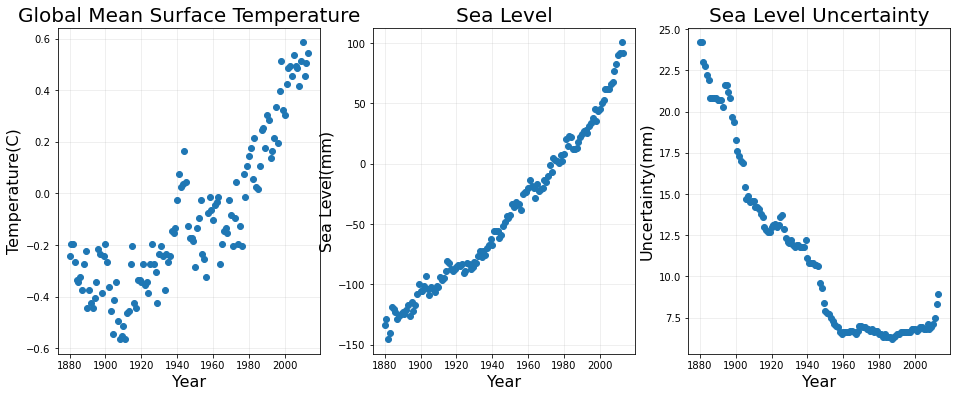

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,6))
axes[0].scatter(year,temperature)
axes[0].set_title("Global Mean Surface Temperature", fontsize=20)
axes[0].set_xlabel("Year", fontsize=16)
axes[0].set_ylabel("Temperature(C)", fontsize=16)
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

axes[1].scatter(year,sealevel)
axes[1].set_title("Sea Level", fontsize=20)
axes[1].set_xlabel("Year", fontsize=16)
axes[1].set_ylabel("Sea Level(mm)", fontsize=16)
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

axes[2].scatter(year,sealevel_sigma)
axes[2].set_title("Sea Level Uncertainty", fontsize=20)
axes[2].set_xlabel("Year", fontsize=16)
axes[2].set_ylabel("Uncertainty(mm)", fontsize=16)
axes[2].grid(alpha=0.25)
axes[2].set_axisbelow(True)

**Part A (ii):** How does the uncertainty in global mean sea levels change as a function of time?  When is the uncertainty the highest?  Give one reason why you think this might be the case.

Uncertainty decreases steadily until roughly 1960, where it stays relatively constant until ~2010, where it appears to be beginning to increase again. Uncertainty is the highest at the first data point from the 19th century. One reason why this may be the case is because uncertainty is affected by the quantity of data among other factors. Since there was much less data on sea level in that time period, the uncertainty is higher. As technology got better and they were able to obtain more and better readings, the uncertainty begins to decrease.

---

**Part B:**  The "out-of-box" sea-level model

In your plot from **(a)**, you should see quite an apparent relationship between increasing temperatures and rising sea levels.  Seeems like someone should try to model the relationship between those two, huh?

In the helper function, slr, below, a simple model for temperature-driven changes in global mean sea level (GMSL) is defined. This is the model of [Rahmstorf (2007)](http://science.sciencemag.org/content/315/5810/368).

The `slr` model takes two parameters, $\alpha$ and $T_{eq}$, and requires a time series of global mean temperatures: `slr(alpha, Teq, temperature)`.
* `alpha` is the sensitivity of sea-level changes to changes in global temperature. The units for $\alpha$ are millimeters of sea-level changes per year, or mm y$^{-1}$.
* `Teq` is the equilibrium global mean temperature, with units of degrees Celsius.
* `temperature` is the time series of global mean surface temperatures, assumed to be relative to the 1961-1990 mean.

For now, you do not need to worry too much about how this model works.  It is very simple, and widely used, but the point here is that you can plug in a particular set of temperatures (the model **forcing**) and parameters ($\alpha$ and $T_{eq}$), and out pops a time series of simulated global mean sea levels.

**Our goal:**  pick good values for $\alpha$ and $T_{eq}$, so that when we run the `slr` model using the observations of temperature (which we plotted above), the model output matches well the observations of global mean sea level (which we also plotted above).

The whole process of figuring out what these good parameter values are is called **model calibration**, and it's awesome.  Model Calibration is the point of this problem. Let's have a look at why we need to do this in the first place, shall we?

The default parameter choices given in the Rahmstorf (2007) paper are $\alpha=3.4$ mm y$^{-1}$ and $T_{eq} = -0.5\ ^{\circ}$C.

**Your task for Part B:**

Make a plot that contains:
* the observed sea level data as scatter points
* the modeled sea levels as a line, using the temperature observations from above as the `temperature` input
* an appropriate legend and axis labels
* $x$ axis is years
* $y$ axis is sea level

Note that after you run the `slr` model, you will need to **normalize** the output relative to the 1961-1990 reference period.  That is because you are going to compare it against data that is also normalized against this reference period. The `years` that correspond to the model output should be the same as the `years` that correspond to the `temperature` input. Normalizing data can mean several things. Follow the steps outlined below to "normalize" the data in the way needed for this problem:
- Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
- Subtract this value from each entry in the "sealevel" list (list returned by the slr function)


Make sure that you normalize the data prior to plotting.

In [19]:
# helpers

def slr(alpha, Teq, temperature):
    '''sea-level emulator of Rahmstorf 2007 (DOI: 10.1126/science.1135456)
    Takes global mean temperature as forcing, and parameters:
    alpha = temperature sensitivity of sea level rise, and
    Teq   = equilibrium temperature,
    and calculates a rise/fall in sea levels, based on whether the temperature
    is warmer/cooler than the equilibrium temperature Teq.
    Here, we are only worrying about alpha (for now!)'''

    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

In [20]:
idx_1961 = year.index(1961)
idx_1991 = year.index(1991)

mean_sealevel = np.mean(sealevel[idx_1961: idx_1991])

model = slr(3.4,-0.5,temperature)
slr_sum = 0
for x in range(idx_1961,idx_1991):
    slr_sum = slr_sum + model[x]
mean_slr = slr_sum/30

#normalize data
norm_sealevel = []
for level in sealevel:
    norm_sealevel.append(level - mean_sealevel)

#normalize modeled data

for i in range(len(model)):
    model[i] = model[i] - mean_slr

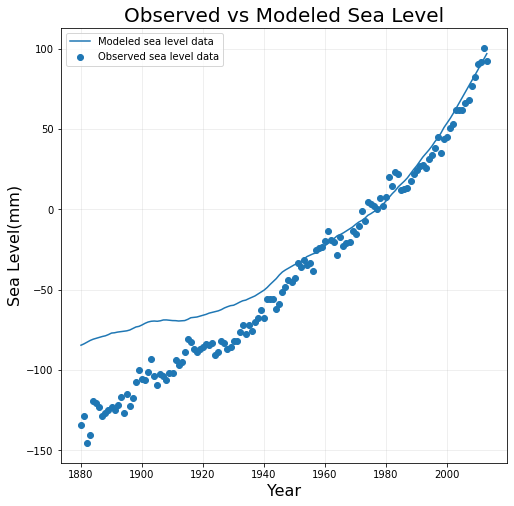

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(year,norm_sealevel,label='Observed sea level data')
ax.plot(year,model, label='Modeled sea level data')
ax.set_title("Observed vs Modeled Sea Level", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sea Level(mm)", fontsize=16)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()


Your plot above ought to show decent match for the late 1900s, but diverge a bit further back in time.

**The point:**  We can do better than this "out-of-the-box" version of the Rahmstorf sea level model.

**Part C:**   Figuring out our objective function

As our **objective function**, we will use the joint likelihood function of the observed sea level data, given the model simulation.  The following is a detailed description of the derivation of the objective funciton for a hill climbing routine. **Note, you do not need to do anything for this part other than to read about the objective function and execute the cell below, then move to part D.**

For a single data point in year $i$, $y_i$, with associated uncertainty $\sigma_i$, we can assume the likelihood for our model simulation in year $i$, $\eta_i$, follows a normal distribution centered at the data point.  The model simulation is a **deterministic** result of our parameter choices $\alpha$ and $T_{eq}$, so we write the likelihood as:

$$L(y_i \mid \alpha, T_{eq}) = \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

But that only uses a single data point.  Let's use all the data!  The **joint likelihood** is the product of all of the likelihoods associated with the individual data points. But that is the product of a lot of numbers that are less than 1, so it will be **tiny**.  Instead, we should try to optimize the **joint log-likelihood**, which is simply the (natural) logarithm of the joint likelihood function.

If we assume the observational data ($y_i$) are all independent, then the joint log-likelihood is:

$$l(\mathbf{y} \mid \alpha, T_{eq}) = -\dfrac{N}{2} \log{(2\pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \dfrac{1}{2}\sum_{i=1}^N \left( \dfrac{\eta_i(\alpha, T_{eq}) - y_i}{\sigma_i} \right)^2$$

where, $\mathbf{y} = [y_1, y_2, \ldots, y_N]$ is the entire vector (list) of sea level observations, $\eta(\alpha, T_{eq}) = [\eta_1(\alpha, T_{eq}), \eta_2(\alpha, T_{eq}), \ldots, \eta_N(\alpha, T_{eq})]$ is the entire vector (list) of `slr` model output when the parameter values $\alpha$ and $T_{eq}$ are used, and $N$ is the number of observations we have.

**Defining our objective function**

Now define a `log_likelihood(parameters, obs_mu, obs_sigma)` function:
* `parameters`: argument that is a list of two parameter values, $[\alpha, T_{eq}]$
  * within the likelihood function, you will need to generate the model simulation $\eta(\alpha, T_{eq})$ using the input `parameters`, for comparison against the observational data
* `obs_temp`: argument that is a time series (list) of observed global mean temperatures, that will be used to run the `slr` model. Provide a default value of `temperature` for this, because we only have one temperature data set to use, and we don't want to keep 
* `obs_mu`: argument that is a time series (list) of observed values, that will be used for comparison against the `model` output. Provide a default value of `sealevel` here, because we won't be changing the observational data.
* `obs_sigma`: argument that is a time series (list) of the corresponding uncertainties in the observational data. Simiarly, provide a default value of `sealevel_sigma` here, so we can avoid the tedious task of sending the data set into this function.
* all three of these inputs should be lists, and should be the same length
* this routine should return a **single** float number, that is the joint log-likelihood of the given `model` simulation.

In [22]:
# Here is the objective function. You will be using this function below when you code up hill-climbing and 
# simulated annealing routines.

def log_likelihood(parameters, obs_temp=temperature, obs_mu=sealevel, obs_sigma=sealevel_sigma):
    model = slr(alpha=parameters[0], Teq=parameters[1], temperature=temperature)
    
    # normalize
    reference = (year.index(1961), year.index(1990))
    model -= np.mean(model[reference[0]:(reference[1]+1)])

    return np.sum([np.log(stats.norm.pdf(x=model, loc=obs_mu, scale=obs_sigma))])

**Part D:**  Defining our class structure

Now we will apply a hill-climbing algorithm to tune the $\alpha$ and $T_{eq}$ parameters.

Using our in-class lecture notebook on hill-climbing as a guide, do the following:

* Define a `State` class, with attributes for the parameter values (which define the state) and the objective function value of that state.
* Define a `Problem_hillclimb` **sub-class** of the more general class `Problem`, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * methods for `moves` (return the list of all possible moves from the current state) and `best_move` (return the move that maximizes the objective function).
  * the `moves` available should be in proper 2-dimensional space.  Do **not** simply optimize one parameter, keeping the other fixed, then optimize the other parameter, while keeping the first fixed.  (*That method *can* work, but there are some theoretical issues that would need to be tackled, and we are not getting into that here.*) You are allowed to restrict yourself to movements along a grid, as long as you entertain steps in both the $\alpha$ and the $T_{eq}$ directions.
* Define the `hill_climb` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `hill_climb(problem, n_iter)`:  arguments are a `Problem_hillclimb` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

In [23]:
class state:

    def __init__(self, parameters, value):
        self.parameters = (parameters[0],parameters[1])
        self.value = value    

class problem:
    
    def __init__(self, initial, objective_function, stepsize):
        self.initial_state = initial
        self.current_state = initial
        self.objective_function = objective_function
        self.stepsize_alpha = stepsize[0]
        self.stepsize_teq = stepsize[1]
        
        
class problem_hillclimb(problem):
    
    
    def moves(self):
        '''return all possible moves to make from the current_state'''
        all_moves = []
        all_moves.append((self.current_state.parameters[0] + self.stepsize_alpha, self.current_state.parameters[1] + self.stepsize_teq))
        all_moves.append((self.current_state.parameters[0] + self.stepsize_alpha, self.current_state.parameters[1] - self.stepsize_teq))
        all_moves.append((self.current_state.parameters[0] - self.stepsize_alpha, self.current_state.parameters[1] + self.stepsize_teq))
        all_moves.append((self.current_state.parameters[0] - self.stepsize_alpha, self.current_state.parameters[1] - self.stepsize_teq))
        return all_moves
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        all_moves = self.moves()
        #calc objective function value for each possible move
        alpha_index = 0
        teq_index = 0
        max_alpha = self.objective_function([all_moves[0][0], self.current_state.parameters[1]])
        max_teq = self.objective_function([self.current_state.parameters[0], all_moves[0][1]])
        
        for i, m in enumerate(all_moves):
            if max_alpha <= self.objective_function([m[0], self.current_state.parameters[1]]):
                max_alpha = self.objective_function([m[0], self.current_state.parameters[1]])
                alpha_index = i
                
            if max_teq <= self.objective_function([self.current_state.parameters[0], m[1]]):
                max_teq = self.objective_function([self.current_state.parameters[0], m[1]])
                teq_index = i   
        
        best_alpha = all_moves[alpha_index][0]
        best_teq = all_moves[teq_index][1]
        
        if self.objective_function([self.current_state.parameters[0], best_teq]) <= self.objective_function([best_alpha, self.current_state.parameters[1]]):
            return best_alpha, self.current_state.parameters[1]
        else:
            return self.current_state.parameters[0], best_teq

        
    
def hill_climb(problem, n_iter):
    # iterate until we can't do any better
    for k in range(n_iter):
        move = problem.best_move()
        if problem.current_state.value <= problem.objective_function(move):
            problem.current_state.parameters = move
            problem.current_state.value = problem.objective_function(problem.current_state.parameters)
        else:
            return problem.current_state
    print('reached n_iter')
    return False

    
    

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a hill-climbing problem object, using this initial state, the log-likelihood objective function, and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
3. ***hill-climb!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**
* As a benchmark, make sure that your log-likelihood is *at least* -500.
* Your calibrated (optimized) model simulation should be going straight through the data points.
* If this isn't the case, remember to normalize your model against the 1961-1990 reference period!

alpha = 2.599999999999999 t_eq = -0.7400000000000002 log-likelihood = -475.3420413531085


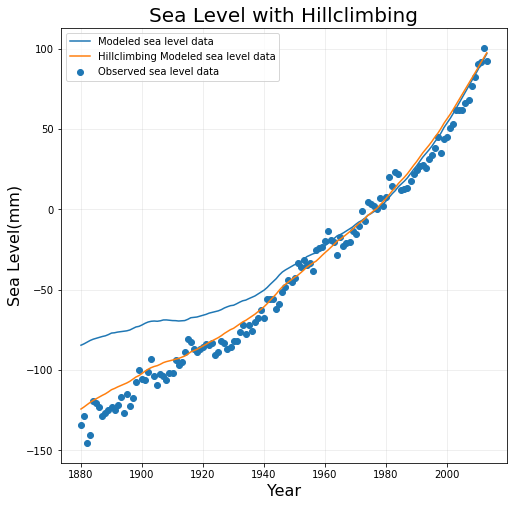

In [24]:
initial_state = state(parameters=[3.4,-0.5], value=log_likelihood([3.4,-0.5]))

h = problem_hillclimb(initial=initial_state, objective_function=log_likelihood, stepsize=[0.1,0.02])
res = hill_climb(h, n_iter=1000)
print('alpha =', res.parameters[0], 't_eq =', res.parameters[1], 'log-likelihood =', res.value)

model_prime = slr(res.parameters[0], res.parameters[1], temperature)
mean_model_prime = np.mean(model_prime[idx_1961:idx_1991])
for x in range(len(model_prime)):
    model_prime[x] = model_prime[x] - mean_model_prime

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(year,norm_sealevel,label='Observed sea level data')
ax.plot(year, model, label='Modeled sea level data')
ax.plot(year,model_prime, label='Hillclimbing Modeled sea level data')
ax.set_title("Sea Level with Hillclimbing", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sea Level(mm)", fontsize=16)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()


**Part E:**  Simulated annealing

Let's re-calibrate the `slr` model. This time, we will use **simulated annealing**. Again, using our in-class activity as a guide, do the following:

* Continue to use your `State` class above.
* Define a `Problem_annealing` sub-class of the `Problem` class, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * method for `random_move`, to pick a random move **by drawing from a multivariate normal distribution**.  You should use the `stepsize` attribute as the covariance (width) for this.
* Define the `simulated_annealing` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `simulated_annealing(problem, n_iter)`:  arguments are a `Problem_annealing` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

Subject to the above constraints, you may implement these however you would like.

In [25]:
class problem_annealing(problem):
    
    def __init__(self, initial, objective_function, schedule_function, stepsize):
        problem.__init__(self, initial, objective_function, stepsize)
        self.schedule_function = schedule_function
    
    def random_move(self):
        mean = self.current_state.parameters
        steps = [[self.stepsize_alpha, 0],[0, self.stepsize_teq ]]
        #Multivariate normal dist
        m = np.random.multivariate_normal(mean, steps, 1).T
        return [m[0][0], m[1][0]]


def schedule(time):
    C = 3
    p = 2
    temperature = C/(time+1)**p
    return temperature
    
def simulated_annealing(problem,n_iter):
    for t in range(n_iter):
        temp = schedule(time.perf_counter())
        random_move = problem.random_move()
        delta_obj = problem.objective_function(random_move) - problem.current_state.value
        if delta_obj > 0:
            problem.current_state.parameters = random_move
            problem.current_state.value = problem.objective_function(random_move)
        else:
            p_accept = np.exp(delta_obj /temp)
            choices = np.array([[random_move], [problem.current_state.parameters]])
            idx = np.random.choice(len(choices),1, p=[p_accept, 1-p_accept])
            problem.current_state.parameters = choices[idx][0][0]
            problem.current_state.value = problem.objective_function(problem.current_state.parameters)
    return problem.current_state

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a simulated annealing problem object, using this initial state, the log-likelihood objective function, an appropriate temperature updating schedule and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
  * note that this "temperature" is distinct from the actual physical temperature used as input to drive the `slr` model
3. ***anneal!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**  How does your model look when you plot it against the data? If it doesn't look good, then you failed this unit test :(

alpha = 1.9042035897157674 t_eq = -0.9730784032780994 log likelihood = -465.4990627131385


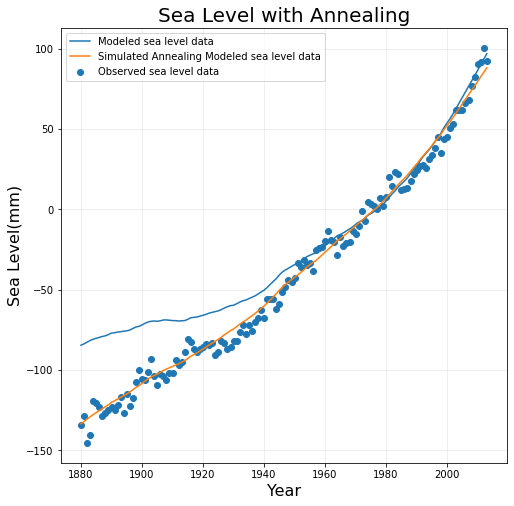

In [26]:
initial_state = state(parameters=[3.4,-0.5], value=log_likelihood([3.4,-0.5]))

h_anneal = problem_annealing(initial=initial_state, objective_function=log_likelihood, schedule_function = schedule, stepsize=[0.1,0.02])
res_anneal = simulated_annealing(h_anneal, 1000)
print('alpha =', res_anneal.parameters[0], 't_eq =', res_anneal.parameters[1], 'log likelihood =', res_anneal.value)

model_anneal = slr(res_anneal.parameters[0], res_anneal.parameters[1], temperature)
mean_model_anneal = np.mean(model_anneal[idx_1961:idx_1991])
for x in range(len(model_anneal)):
    model_anneal[x] = model_anneal[x] - mean_model_anneal

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(year,norm_sealevel,label='Observed sea level data')
ax.plot(year, model, label='Modeled sea level data')
ax.plot(year,model_anneal, label='Simulated Annealing Modeled sea level data')
ax.set_title("Sea Level with Annealing", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sea Level(mm)", fontsize=16)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

**Part F:**

Briefly summarize your findings. Specifically discuss the $\alpha$ and $T_{eq}$ parameter values you found in **Part D** and **Part E**. How do these compare to the parameters of the model given by Rahmstorf? Did your hill-climbing and/or your simulated annealing programs find a better fit than the Rahmstorf model? 

The initial parameters were 3.4 and -0.5 for $\alpha$ and $T_{eq}$.  
The parameters found in part D were $\alpha = 2.60$ and $T_{eq} = -0.74$.    
The parameters found in part E were $\alpha = 1.89$ and $T_{eq} = -0.98$.    

Both the hillclimbing and simulated annealing models have a lower $\alpha$ value as well as a more negative $T_{eq}$.  The hillclimbing and simulated annealing programs both found a much better fit than the Rahmstorf model, as they match the actual data throughout the whole timeline rather than only matching well aftre 1960.